In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
df=pd.read_csv("C:\\Users\\sekuc\\OneDrive\\Desktop\\Machine Learning\\Titanic-Dataset.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# SOME COLUMS HAVE MISSING VALUES

In [11]:
df['Sex'].value_counts().index

Index(['male', 'female'], dtype='object', name='Sex')

# PLOTTING CATEGORIC VALUES

In [12]:
def bar_plot(variable):

    var=df[variable]

    varValue=var.value_counts()        # SINCE ITS CATEGORIC COLUMN

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index , varValue)   # VALUE COLUNTS DF INDEX  + FREQUENCY
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()

    

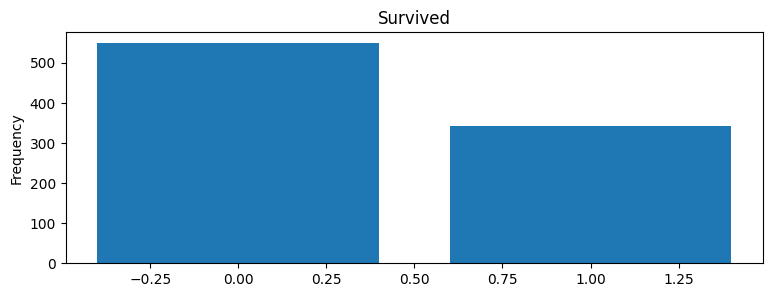

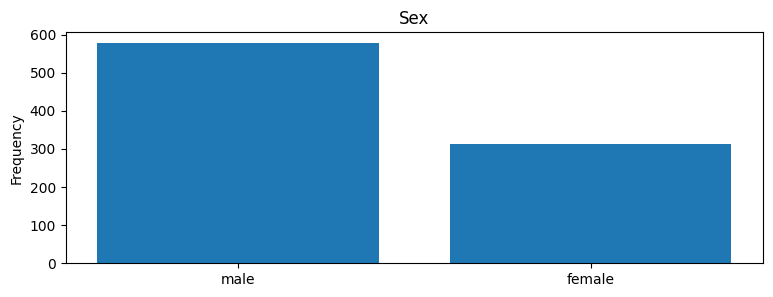

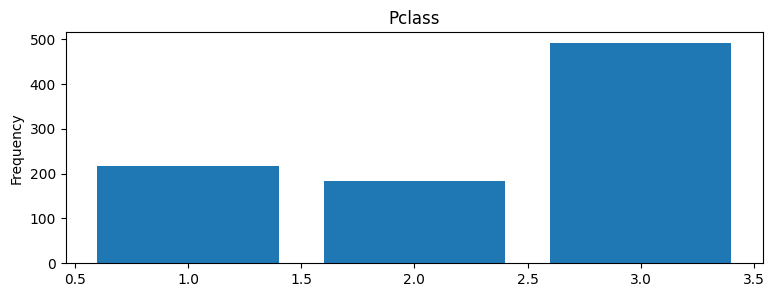

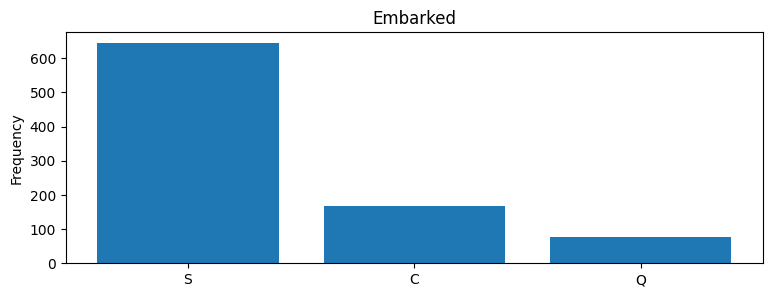

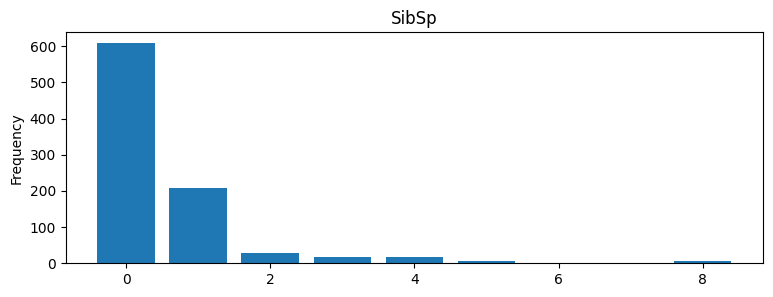

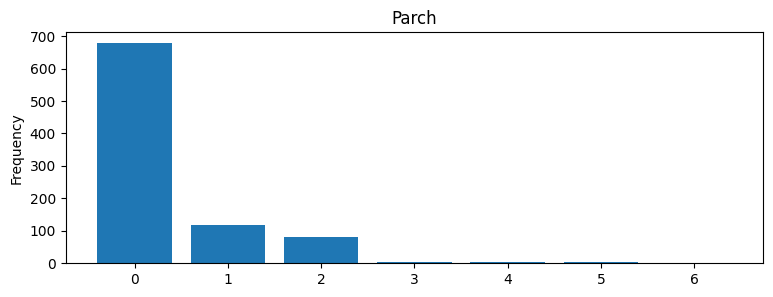

In [13]:
category1=['Survived','Sex','Pclass','Embarked','SibSp','Parch']

for c in category1:
    bar_plot(c)

# PLOTTING NUMERIC VALUES

In [14]:
def hist_plot(variable):

    plt.hist(df[variable])
    plt.title(variable)
    plt.show()

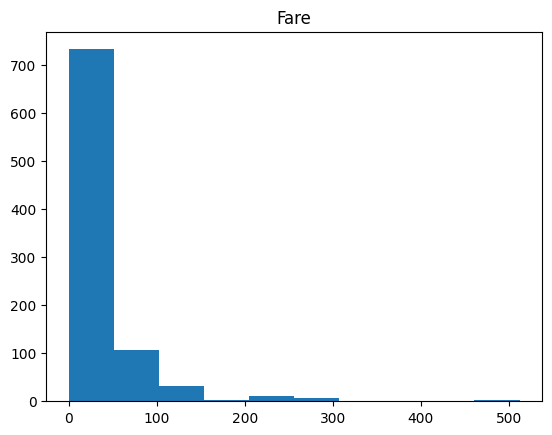

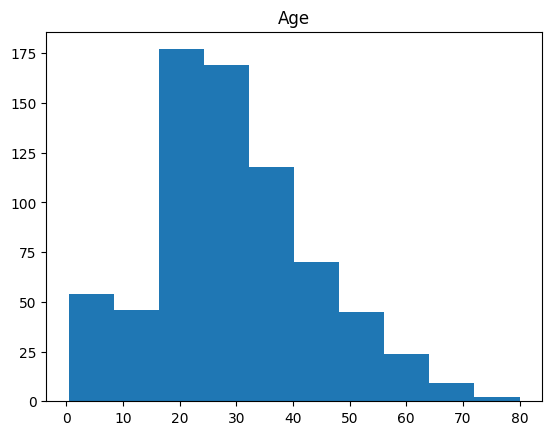

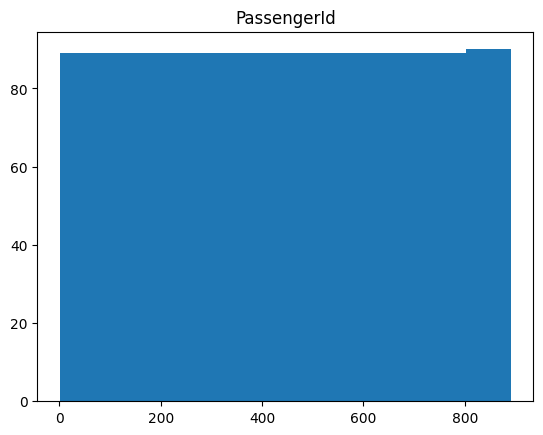

In [15]:
num1=['Fare','Age','PassengerId']

for c in num1:
    hist_plot(c)

# BASIC DATA ANALYSIS

### PASSENGER SURVIVAL ANALYSIS BY CLASS

In [16]:
df[["Survived","Pclass"]].groupby("Pclass", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


As it seems in the results, class has a strong impact on survival. We will leverage the feature in ML model.

### PASSENGER SURVIVAL ANALYSIS BY SEX

In [17]:
df[["Survived","Sex"]].groupby("Sex", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### PASSENGER SURVIVAL ANALYSIS BY SIBSP

In [18]:
df[["Survived","SibSp"]].groupby("SibSp", as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### PASSENGER SURVIVAL ANALYSIS BY PARCH

In [19]:
df[["Survived","Parch"]].groupby("Parch", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### OUTLIER DETECTION

In [20]:
def detect_outliers(df,features):
    outlier_indices=[]

    for c in features:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)

        IQR=Q3-Q1

        outlier_step=IQR*1.5
        # DETECT OUTLIER AND ITS INDECES
        outlier_list_col= df[(df[c]< Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices=Counter(outlier_indices)           # KEY VALUE PAIR IN OUTLIERS
    multiple_outliers=list(i for i,v in outlier_indices.items() if v >2)    # CREATE LIST TO FILTER OUT FREQUENT OUTLIERS   

    return multiple_outliers

In [21]:
df.loc[detect_outliers(df,['Age','SibSp', 'Parch','Fare'])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
df=df.drop(detect_outliers(df,['Age','SibSp', 'Parch','Fare']), axis=0).reset_index(drop=True)      # REMOVE THE ROWS FROM MAIN DF + RESET THE INDEX

# MISSING VALUES

In [23]:
df_len=len(df)
print(df_len)

881


In [24]:
df.columns[df.isnull().any()]           # THE COLUMNS WHIH HAVE MISSING VALUE

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [26]:
df[df["Embarked"].isnull()]        # EXTRACTING THE EMBARKED COLUMNS MISSING VALUE DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

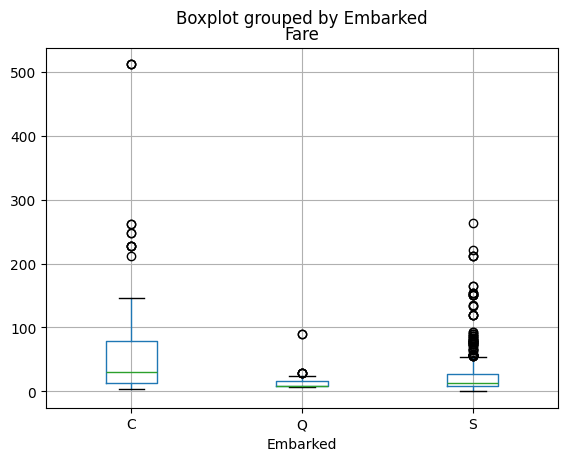

In [27]:
df.boxplot(column="Fare", by="Embarked")        # Enables us to interpret how datasets closes to our missing value's fare

In [28]:
df["Embarked"]=df["Embarked"].fillna("C")

df["Embarked"].isnull().sum()

np.int64(0)

# VISUALIZATION

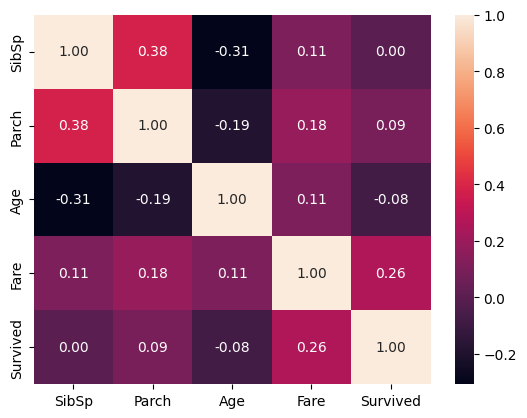

In [29]:
list1=['SibSp','Parch','Age','Fare','Survived']

cor=df[list1].corr()

sns.heatmap(cor,annot=True,fmt='.2f')
plt.show()


### CATPLOT FOR COMPARISION OF CAT VALUES

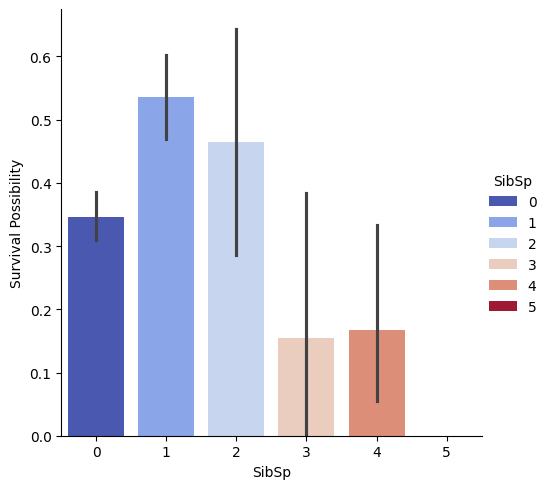

In [30]:
g=sns.catplot(x='SibSp', y='Survived', data=df, kind='bar',hue='SibSp', palette='coolwarm')

g.set_ylabels('Survival Possibility')

# FACETGRID FOR AGE-SURVIVED ANALYSIS

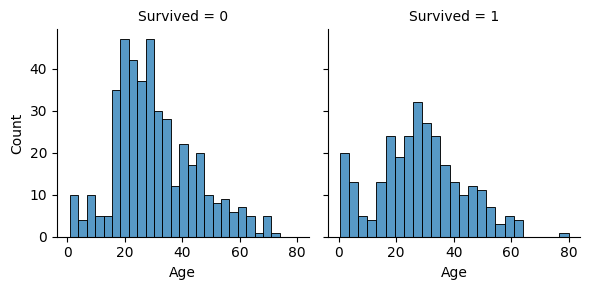

In [31]:
g=sns.FacetGrid(df, col="Survived")
g.map(sns.histplot, "Age", bins=25)
plt.show()

# FACETGRID  PCLASS - SURVIVED - AGE

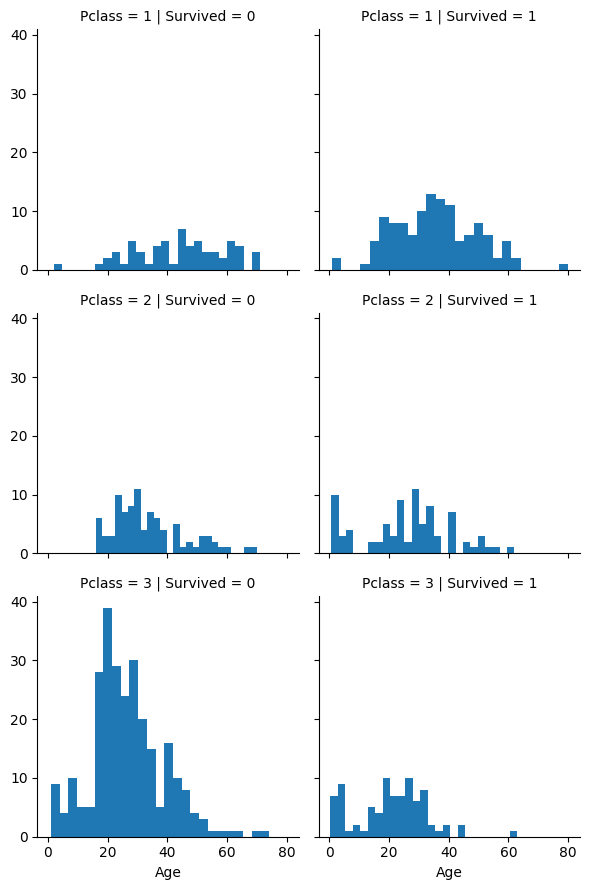

In [32]:
g=sns.FacetGrid(df, col="Survived", row="Pclass")

g.map(plt.hist, "Age", bins=25)

# EMBARKED - SEX- PCLASS - SURVIVED

c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same eff

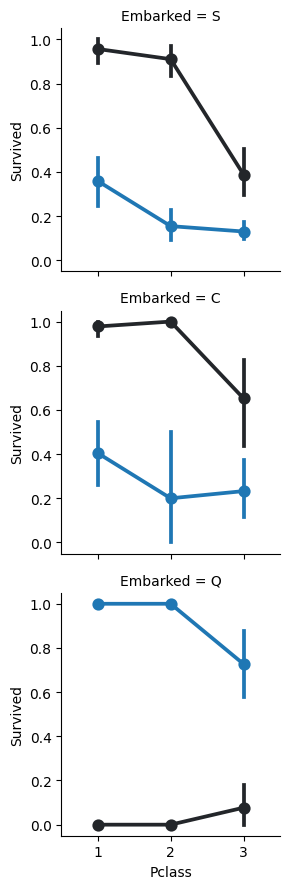

In [33]:
g=sns.FacetGrid(df, row="Embarked")

g.map(sns.pointplot, "Pclass","Survived","Sex")

# MISSING VALUE

In [34]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


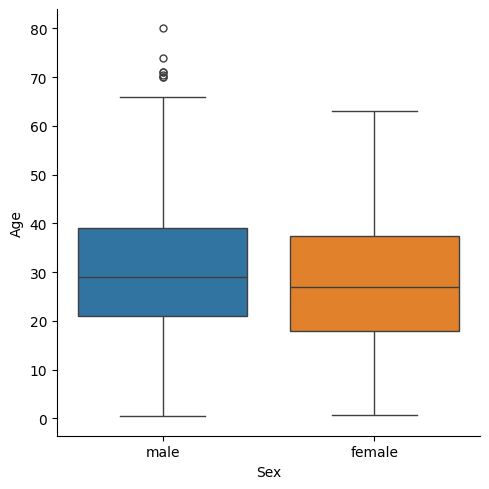

In [35]:
sns.catplot(x="Sex", y="Age", data=df, kind="box", hue="Sex")

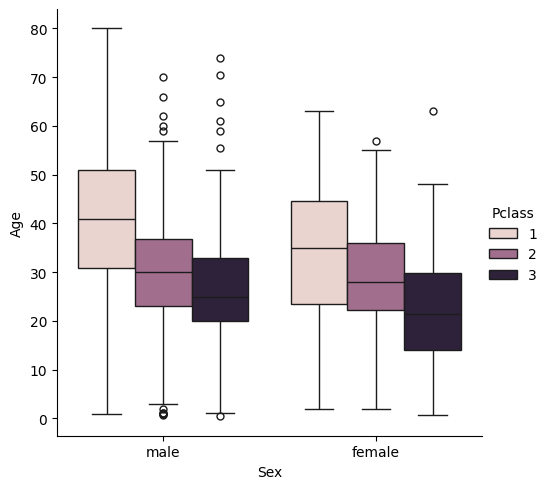

In [36]:
sns.catplot(x="Sex", y="Age", data=df, kind="box", hue="Pclass")

# FILLING MISSING AGE VALUES BY PRESERVING ITS RELATIONSHIP WITH OTHER

In [37]:
# Get the index of the missing 'Age' values
index_nan_age = list(df["Age"][df["Age"].isnull()].index) 

# Calculate the overall median age once
overall_median_age = df['Age'].median()

# Loop through the missing values
for i in index_nan_age:
    # Find the 'Age' values for the same 'SibSp', 'Parch', 'Pclass', and 'Sex'
    age_pred = df[
        (df["SibSp"] == df.iloc[i]["SibSp"]) &
        (df['Parch'] == df.iloc[i]['Parch']) &
        (df['Pclass'] == df.iloc[i]['Pclass']) &
        (df['Sex'] == df.iloc[i]['Sex'])  # Ensure matching 'Sex' as well
    ]['Age']  # We need the 'Age' column specifically

    # Calculate the median of 'Age' for the current group
    age_med_group = age_pred.median()

    # If we have valid predictions, fill the missing 'Age' with the median of the predictions
    if not pd.isna(age_med_group):  # Check if the median of the group is not NaN
        df.loc[i, 'Age'] = age_med_group  # Fill with the median of the matching 'Age' values
    else:
        df.loc[i, 'Age'] = overall_median_age  # If no matches (median is NaN), fill with overall median




c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [38]:
df['Age'].isnull().sum()

np.int64(0)

# FUTURE ENGINEERING

In [39]:
df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [40]:
name=df["Name"]

df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

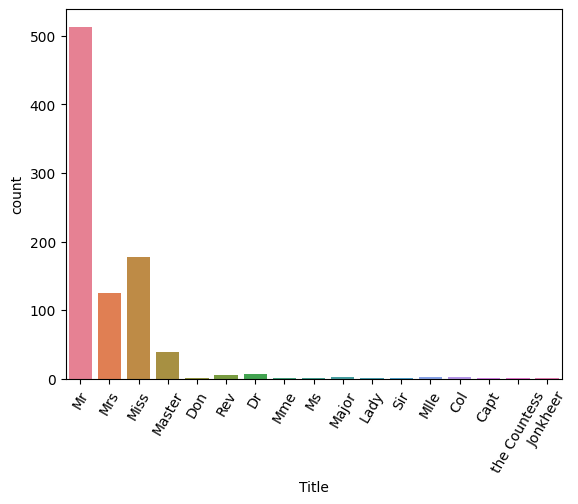

In [41]:
sns.countplot(data=df, x="Title", hue="Title")

plt.xticks(rotation=60)
plt.show()

In [42]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [43]:
df["Title"]=df["Title"].replace( ['Don', 'Rev', 'Dr', 'Mme', 
       'Major', 'Lady', 'Sir',  'Col', 'Capt', 'the Countess',
       'Jonkheer'], "other")

df["Title"]=[0 if i=="Master" else 1 if i=="Miss" or i=="Ms" or i=="Mile" or i=="Mrs" else 2 if i=="Mr" else 3 for i in df["Title"]]

In [44]:
df["Title"]

0      2
1      1
2      1
3      1
4      2
      ..
876    3
877    1
878    1
879    2
880    2
Name: Title, Length: 881, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

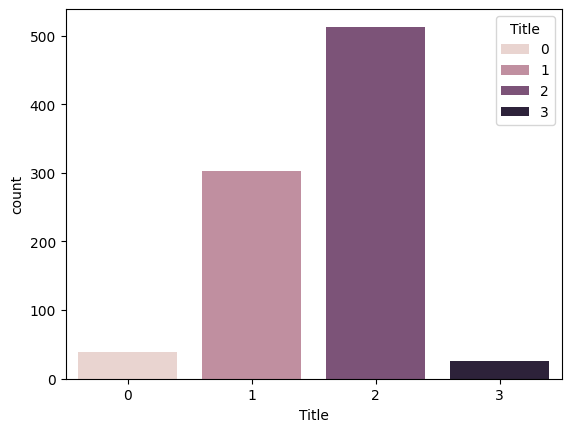

In [45]:
sns.countplot(data=df, x="Title", hue="Title")

THE RELATIONSHIP BETWEEN TITLE AND SURVIVED

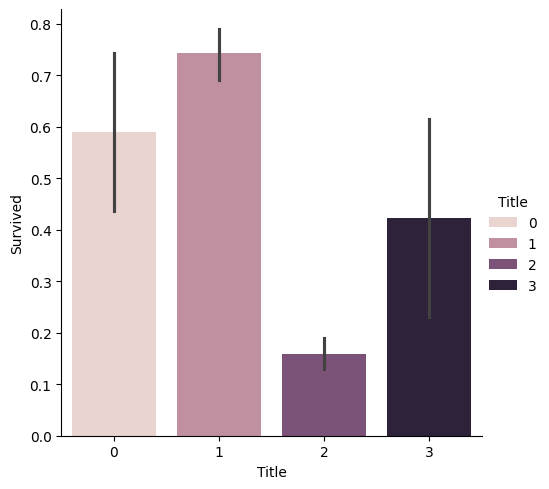

In [46]:
g=sns.catplot(data=df, x="Title", y="Survived", kind="bar", hue="Title")

In [47]:
# Since we extracted new feature from name, we are going to exclude it

In [48]:
df.drop(columns="Name", axis=1, inplace=True)


In [49]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [50]:
df=pd.get_dummies(df, columns=["Title"])

In [51]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


# FAMILY SIZE

In [52]:
#Since we have similar features about family we are going to merge them.

In [53]:
df["Fsize"]=df["SibSp"] + df["Parch"] + 1    # The min family size supposed to be 1 thats why 1 is added as well

In [54]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


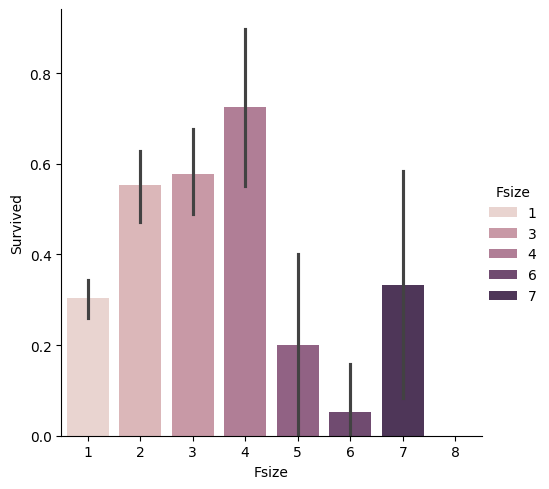

In [55]:
sns.catplot(data=df, x="Fsize", y="Survived", kind="bar", hue="Fsize")

In [56]:
# as it seems in the graph, 4 is big threshold and we are going to use it for extracting new information

df["family_size"]=[1 if i <5 else 0 for i in df['Fsize']]

In [57]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1


<Axes: xlabel='family_size', ylabel='count'>

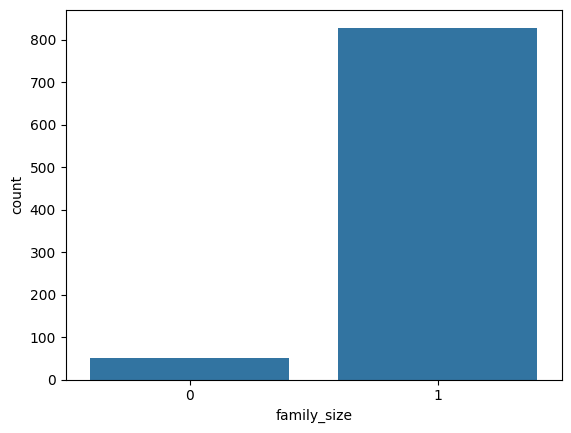

In [58]:
sns.countplot(data=df, x='family_size')   # CATEGORICAL VALUE DISTRIBITION

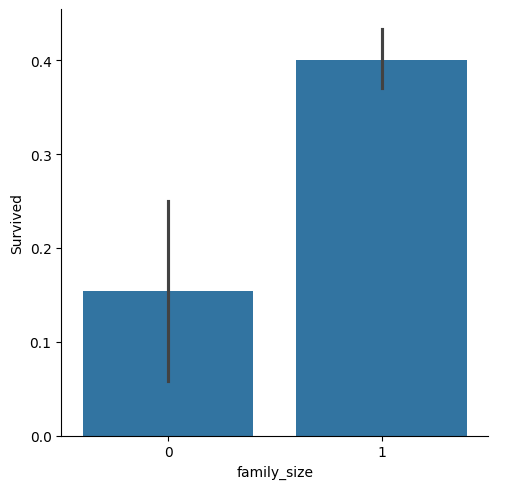

In [59]:
g=sns.catplot(data=df, x='family_size', y="Survived", kind='bar')

In [60]:
df=pd.get_dummies(df, columns=['family_size'])

# CONVERTING EMBARKED COLUMN TO NUMARIC

In [61]:
df=pd.get_dummies(df, columns=['Embarked'])

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True
5,6,0,3,male,27.0,0,0,330877,8.4583,NaN,False,False,True,False,1,False,True,False,True,False
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,False,False,True,False,1,False,True,False,False,True
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,True,False,False,False,5,True,False,False,False,True
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,False,True,False,False,3,False,True,False,False,True
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,False,True,False,False,2,False,True,True,False,False


# TICKET

In [62]:
# There are some special tickets in the Ticket column which has letters

df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [63]:
a='STON/O2. 3101282'

a=a.replace('.','').replace('/','').strip().split(' ')[0]

print(a)

STONO2


In [64]:
tickets=[]

for i in list(df['Ticket']):
    if not i.isdigit():   # CHECK IF THERE IS A DIGIT OR NOT
        tickets.append(i.replace('.','').replace('/','').strip().split(' ')[0])

    else:
        tickets.append('X')


df['Ticket']=tickets

In [65]:
df=pd.get_dummies(df, columns=['Ticket'], prefix='T')       # Adding prefix allows u to understand its ticket column

In [66]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True


# PCLASS

In [67]:
df=pd.get_dummies(df, columns=['Pclass'])

df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


# SEX

In [68]:
df=pd.get_dummies(df, columns=['Sex'])

In [69]:
df.drop(columns=['PassengerId','Cabin'], axis=1 , inplace=True)

In [70]:
df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_X', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

# MODELLING

In [71]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [72]:
train= df[:df_len]

X_train= train.drop(labels="Survived", axis=1)     # Dropping the target value column - no inplace=True
y_train=train["Survived"]

X_train,X_test,y_train,y_test=train_test_split(X_train,y_train, test_size=0.33,random_state=42)

print(len(X_train))
print(len(y_train))

590
590


In [73]:
train.tail()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
876,0,27.0,0,0,13.00,False,False,False,True,1,...,False,False,False,False,True,False,True,False,False,True
877,1,19.0,0,0,30.00,False,True,False,False,1,...,False,False,False,False,True,True,False,False,True,False
878,0,28.0,1,2,23.45,False,True,False,False,4,...,False,False,True,False,False,False,False,True,True,False
879,1,26.0,0,0,30.00,False,False,True,False,1,...,False,False,False,False,True,True,False,False,False,True
880,0,32.0,0,0,7.75,False,False,True,False,1,...,False,False,False,False,True,False,False,True,False,True


# SIMPLE LOGISTIC REGRESSION

In [74]:
logreg=LogisticRegression(max_iter=1000)

logreg.fit(X_train,y_train)

acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)                # TRAIN AND TEST SCORES ARE SUPPOSED TO CLOSE EACH OTHER

print(f"acc_log_train is ½ {acc_log_train},acc_log_test is % {acc_log_test}")

acc_log_train is ½ 83.22,acc_log_test is % 82.13


# HYPERPARAMETER TUNING -  GRID SEARCH - CROSS VALIDATION

In [80]:
random_state = 42
classifier=[DecisionTreeClassifier(random_state= random_state),
SVC(random_state= random_state),
RandomForestClassifier(random_state= random_state), 
LogisticRegression (random_state= random_state), 
KNeighborsClassifier()]
dt_param_grid = {"min_samples_split" :range(10,500,20), 
                 "max_depth": range (1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1], 
                  "C": [1,10,50, 100, 200, 300, 1000]}
rf_param_grid = {"max_features": [1,3,10],
                 "min_samples_split":[2,3,10], 
                 "min_samples_leaf":[1,3,10], "bootstrap": [False],
                "n_estimators":[100,300], 
                "criterion":["gini"]}
logreg_param_grid = {"C":np.logspace (-3,3,7), 
                     "penalty": ["l1","l2"],
                     "solver": ["liblinear"]}
knn_param_grid = {"n_neighbors": np.linspace (1,19, 10, dtype = int).tolist(),
                   "weights": ["uniform", "distance"],
                   "metric": ["euclidean", "manhattan"]}
classifier_param = [dt_param_grid,
svc_param_grid,
rf_param_grid,
logreg_param_grid,
knn_param_grid]

# BEST ESTIMATOR AND BEST SCORE

In [106]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf= GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold (n_splits = 10), scoring = "accuracy", verbose=1 , n_jobs=-1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

print(best_estimators)
print(cv_result)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


c:\Users\sekuc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.8338983050847458
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7915254237288135
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8423728813559321
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8220338983050846
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7830508474576272
[DecisionTreeClassifier(max_depth=7, min_samples_split=70, random_state=42), SVC(C=300, gamma=0.001, random_state=42), RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42), LogisticRegression(C=np.float64(10.0), penalty='l1', random_state=42,
                   solver='liblinear'), KNeighborsClassifier(metric='manhattan', n_neighbors=7)]
[np.float64(0.8338983050847458), np.float64(0.7915254237288135), np.float64(0.8423728813559321), np.float64(0.8220338983050846), np.float64(0.7830508474576272)]


In [84]:
cv_results=pd.DataFrame({'Cross Validation Means': cv_result, 'ML_Model': classifier})

cv_results

,Cross Validation Means,ML_Model
0,0.833898,DecisionTreeClassifier(random_state=42)
1,0.791525,SVC(random_state=42)
2,0.842373,RandomForestClassifier(random_state=42)
3,0.822034,LogisticRegression(random_state=42)
4,0.783051,KNeighborsClassifier()


In [93]:
cv_results['ML_Model'] = cv_results['ML_Model'].apply(lambda x: str(x).split('(')[0])



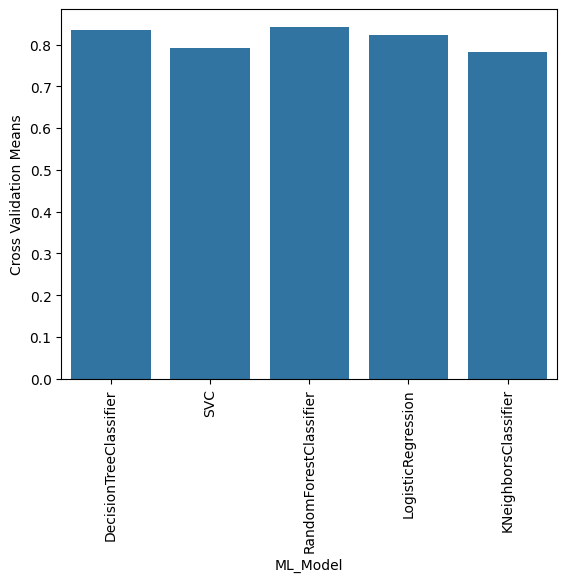

In [96]:
sns.barplot(data=cv_results, x='ML_Model', y='Cross Validation Means')
plt.xticks(rotation=90)
plt.show()

# Ensemble Modeling

In [105]:
print(best_estimators[0])
print(best_estimators[2])
print(best_estimators[3])



DecisionTreeClassifier(max_depth=7, min_samples_split=70, random_state=42)
RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42)
LogisticRegression(C=np.float64(10.0), penalty='l1', random_state=42,
                   solver='liblinear')


In [100]:
votingC = VotingClassifier(estimators =[("dt", best_estimators[0]), 
                                         ("rfc", best_estimators [2]),
                                         ("lr",best_estimators [3])], 
                                         voting= "soft", n_jobs = -1)

votingC =votingC.fit(X_train, y_train)
print (accuracy_score (votingC.predict(X_test),y_test))

0.8178694158075601
